<h1>Mount Google Drive in Colab</h1>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>Load Job Market Dataset CSVs into Pandas DataFrames</h1>

In [10]:
import pandas as pd
# Define the base path to the project folder in Google Drive
base_path = "/content/drive/MyDrive/job_market_project/"

# Load the CSV files into Pandas DataFrames
df_postings = pd.read_csv(base_path + "job_postings.csv")
df_skills = pd.read_csv(base_path + "job_skills.csv")
df_summary = pd.read_csv(base_path + "job_summary.csv")

# Display the first few rows of the job postings DataFrame
df_postings.head()


job_link  \
0  https://www.linkedin.com/jobs/view/senior-mach...   
1  https://www.linkedin.com/jobs/view/principal-s...   
2  https://www.linkedin.com/jobs/view/senior-etl-...   
3  https://www.linkedin.com/jobs/view/senior-data...   
4  https://www.linkedin.com/jobs/view/lead-data-e...   

             last_processed_time   last_status got_summary got_ner  \
0  2024-01-21 08:08:48.031964+00  Finished NER           t       t   
1  2024-01-20 04:02:12.331406+00  Finished NER           t       t   
2  2024-01-21 08:08:31.941595+00  Finished NER           t       t   
3  2024-01-20 15:30:55.796572+00  Finished NER           t       t   
4  2024-01-21 08:08:58.312124+00  Finished NER           t       t   

  is_being_worked                                     job_title  \
0               f              Senior Machine Learning Engineer   
1               f  Principal Software Engineer, ML Accelerators   
2               f          Senior ETL Data Warehouse Specialist   
3               f   Senior Data Warehouse Developer / Architect   
4               f                            Lead Data Engineer   

              company       job_location  first_seen search_city  \
0   Jobs for Humanity      New Haven, CT  2024-01-14  East Haven   
1              Aurora  San Francisco, CA  2024-01-14  El Cerrito   
2  Adame Services LLC       New York, NY  2024-01-14  Middletown   
3    Morph Enterprise     Harrisburg, PA  2024-01-12     Lebanon   
4                Dice          Plano, TX  2024-01-14    McKinney   

  search_country                 search_position   job_level job_type  
0  United States  Agricultural-Research Engineer  Mid senior   Onsite  
1  United States                  Set-Key Driver  Mid senior   Onsite  
2  United States    Technical Support Specialist   Associate   Onsite  
3  United States                       Architect  Mid senior   Onsite  
4  United States        Maintenance Data Analyst  Mid senior   Onsite

<h1>Inspect Column Names and Dimensions of DataFrames</h1>

In [11]:
# Display column names of each DataFrame to understand their structure
print(df_postings.columns)
print(df_skills.columns)
print(df_summary.columns)

# Display the number of rows and columns in each DataFrame
print(df_postings.shape, df_skills.shape, df_summary.shape)


Index(['job_link', 'last_processed_time', 'last_status', 'got_summary',
       'got_ner', 'is_being_worked', 'job_title', 'company', 'job_location',
       'first_seen', 'search_city', 'search_country', 'search_position',
       'job_level', 'job_type'],
      dtype='object')
Index(['job_link', 'job_skills'], dtype='object')
Index(['job_link', 'job_summary'], dtype='object')
(12217, 15) (12217, 2) (12217, 2)


In [12]:
df_skills.head()

job_link  \
0  https://www.linkedin.com/jobs/view/senior-mach...   
1  https://www.linkedin.com/jobs/view/principal-s...   
2  https://www.linkedin.com/jobs/view/senior-etl-...   
3  https://www.linkedin.com/jobs/view/senior-data...   
4  https://www.linkedin.com/jobs/view/lead-data-e...   

                                          job_skills  
0  Machine Learning, Programming, Python, Scala, ...  
1  C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...  
2  ETL, Data Integration, Data Transformation, Da...  
3  Data Lakes, Data Bricks, Azure Data Factory Pi...  
4  Java, Scala, Python, RDBMS, NoSQL, Redshift, S...

In [13]:
df_summary.head()

job_link  \
0  https://www.linkedin.com/jobs/view/senior-mach...   
1  https://www.linkedin.com/jobs/view/principal-s...   
2  https://www.linkedin.com/jobs/view/senior-etl-...   
3  https://www.linkedin.com/jobs/view/senior-data...   
4  https://www.linkedin.com/jobs/view/lead-data-e...   

                                         job_summary  
0  Company Description\nJobs for Humanity is part...  
1  Who We Are\nAurora (Nasdaq: AUR) is delivering...  
2  Location: New York City, NY\nPosition Summary\...  
3  Responsibilities:\nCandidate must have signifi...  
4  Dice is the leading career destination for tec...

<h1>Normalize and Flatten Skills Data into a Single Series</h1>

In [14]:
# Initialize a list to store individual skills
all_skills = []

# Iterate over the 'job_skills' column, ignoring missing values
for skills in df_skills['job_skills'].dropna():
    # Split the skills string by comma and normalize each skill
    for s in skills.split(","):
        all_skills.append(s.strip().lower())

# Convert the list of skills into a Pandas Series for further analysis
import pandas as pd
skills_series = pd.Series(all_skills)


<h1>Identify Top 20 Most Frequent Skills</h1>

In [15]:
# Count the frequency of each skill and select the top 20 most common skills
top_skills = skills_series.value_counts().head(20)

# Display the top 20 skills with their counts
print(top_skills)


python                  4810
sql                     4610
data analysis           3293
machine learning        2684
communication           2506
data visualization      2330
aws                     1740
project management      1737
data engineering        1714
communication skills    1712
tableau                 1705
data science            1691
r                       1544
data modeling           1520
data management         1470
java                    1434
problem solving         1410
data warehousing        1408
data analytics          1402
spark                   1395
Name: count, dtype: int64


<h1>Visualize Top 20 In-Demand Skills Using a Horizontal Bar Chart<h1>

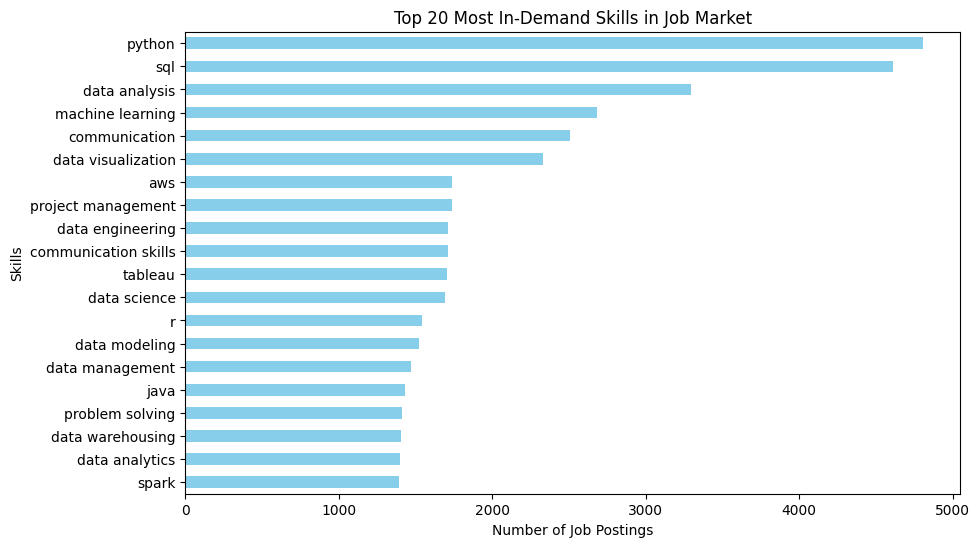

In [16]:
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(10,6))

# Plot a horizontal bar chart of the top 20 skills
top_skills.sort_values().plot(kind='barh', color='skyblue')

# Add chart title and axis labels
plt.title("Top 20 Most In-Demand Skills in Job Market")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skills")

# Display the plot
plt.show()


<h1>Generate and Visualize Word Cloud from Job Summaries</h1>

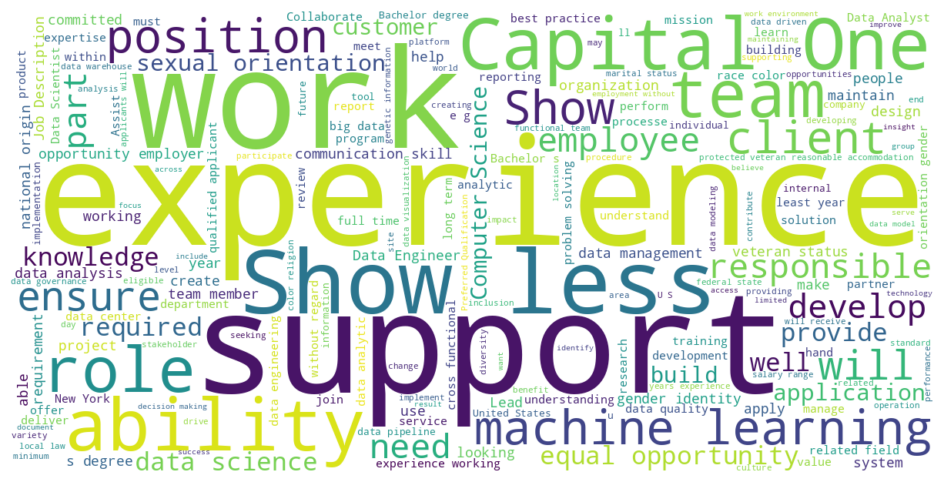

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all non-missing job summaries into a single text string
text = " ".join(df_summary['job_summary'].dropna().astype(str).tolist())

# Generate a word cloud from the combined text
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes for better visualization
plt.show()


<h1>Merge Job Postings with Corresponding Skills</h1>

In [18]:
# Merge the job postings DataFrame with the skills DataFrame on the 'job_link' column
merged = df_postings.merge(df_skills, on="job_link")

# Display the first few rows showing job titles and their associated skills
merged[['job_title', 'job_skills']].head()


job_title  \
0              Senior Machine Learning Engineer   
1  Principal Software Engineer, ML Accelerators   
2          Senior ETL Data Warehouse Specialist   
3   Senior Data Warehouse Developer / Architect   
4                            Lead Data Engineer   

                                          job_skills  
0  Machine Learning, Programming, Python, Scala, ...  
1  C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...  
2  ETL, Data Integration, Data Transformation, Da...  
3  Data Lakes, Data Bricks, Azure Data Factory Pi...  
4  Java, Scala, Python, RDBMS, NoSQL, Redshift, S...

<h1>Define Function to Retrieve Top Skills for a Specific Job Role</h1>

In [19]:
def get_top_skills(role_keyword, n=15):
    # Filter job postings where the title contains the role keyword (case-insensitive)
    subset = merged[merged['job_title'].str.contains(role_keyword, case=False, na=False)]

    # Extract and clean skills from the filtered subset
    all_skills = []
    for skills in subset['job_skills'].dropna():
        for s in skills.split(","):
            all_skills.append(s.strip().lower())

    # Return the top 'n' most frequent skills
    return pd.Series(all_skills).value_counts().head(n)


Retrieve and Display Top Skills for Specific Job Roles

In [20]:
# Retrieve top skills for selected job roles using the previously defined function
top_ds = get_top_skills("Data Scientist")
top_de = get_top_skills("Data Engineer")
top_analyst = get_top_skills("Analyst")

# Display the top skills for each role
print("Top Skills for Data Scientist:\n", top_ds, "\n")
print("Top Skills for Data Engineer:\n", top_de, "\n")
print("Top Skills for Analyst:\n", top_analyst, "\n")


Top Skills for Data Scientist:
 python                683
machine learning      610
data science          558
sql                   488
r                     398
data visualization    317
statistics            308
data analysis         257
communication         204
data mining           184
tableau               183
spark                 183
computer science      151
tensorflow            144
aws                   144
Name: count, dtype: int64 

Top Skills for Data Engineer:
 python              1303
sql                 1119
data engineering     911
spark                727
java                 670
aws                  647
scala                642
snowflake            630
data warehousing     567
hadoop               564
kafka                538
machine learning     434
redshift             420
data modeling        411
nosql                409
Name: count, dtype: int64 

Top Skills for Analyst:
 data analysis           1634
sql                     1493
data visualization      1151
pyth

<h1>Visualize Top Skills for Data Scientist, Data Engineer, and Analyst</h1>

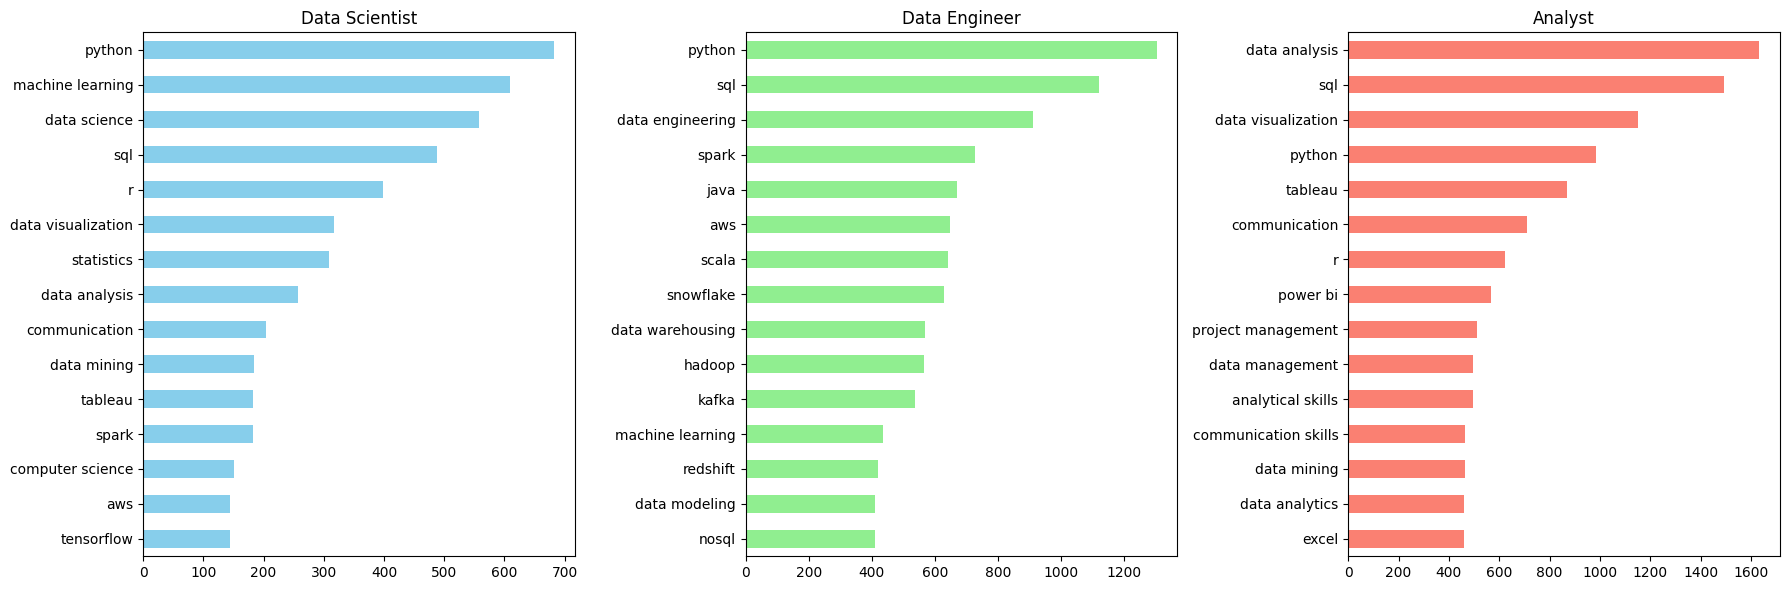

In [21]:
import matplotlib.pyplot as plt

# Create a 1x3 subplot to compare top skills across roles
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# Plot horizontal bar charts for each role's top skills
top_ds.sort_values().plot(kind='barh', ax=axes[0], color='skyblue', title="Data Scientist")
top_de.sort_values().plot(kind='barh', ax=axes[1], color='lightgreen', title="Data Engineer")
top_analyst.sort_values().plot(kind='barh', ax=axes[2], color='salmon', title="Analyst")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


Preview Unique Job Locations

In [22]:
# Display the first 50 unique job locations to understand dataset coverage
df_postings["job_location"].dropna().unique()[:50]

array(['New Haven, CT', 'San Francisco, CA', 'New York, NY',
       'Harrisburg, PA', 'Plano, TX', 'Chicago, IL', 'Boston, MA',
       'Scranton, PA', 'Lake Buena Vista, FL', 'Sunnyvale, CA',
       'Atlanta, GA', 'Pasadena, CA', 'Yorba Linda, CA',
       'Wolverhampton, England, United Kingdom',
       'Waterloo, Ontario, Canada', 'Austin, TX',
       'State College-DuBois Area', 'Minneapolis, MN',
       'Mississippi, United States', 'Greenwood Village, CO',
       'Palo Alto, CA', 'London, England, United Kingdom', 'St Louis, MO',
       'Albany, NY', 'Fredericksburg, VA', 'Washington, DC',
       'Waukesha, WI', 'Philadelphia, PA', 'Dallas, TX',
       'Awsworth, England, United Kingdom', 'Port Hueneme, CA',
       'Paris, TX', 'National, MD', 'West Lafayette, IN',
       'Wembley, England, United Kingdom', 'Santa Clara, CA',
       'Richmond, VA', 'Chantilly, VA', 'Winston-Salem, NC',
       'Sheffield, England, United Kingdom', 'Seattle, WA', 'Cypress, CA',
       'San Antonio, T

Analyze and Visualize Top Skills by Location (Example: New York)

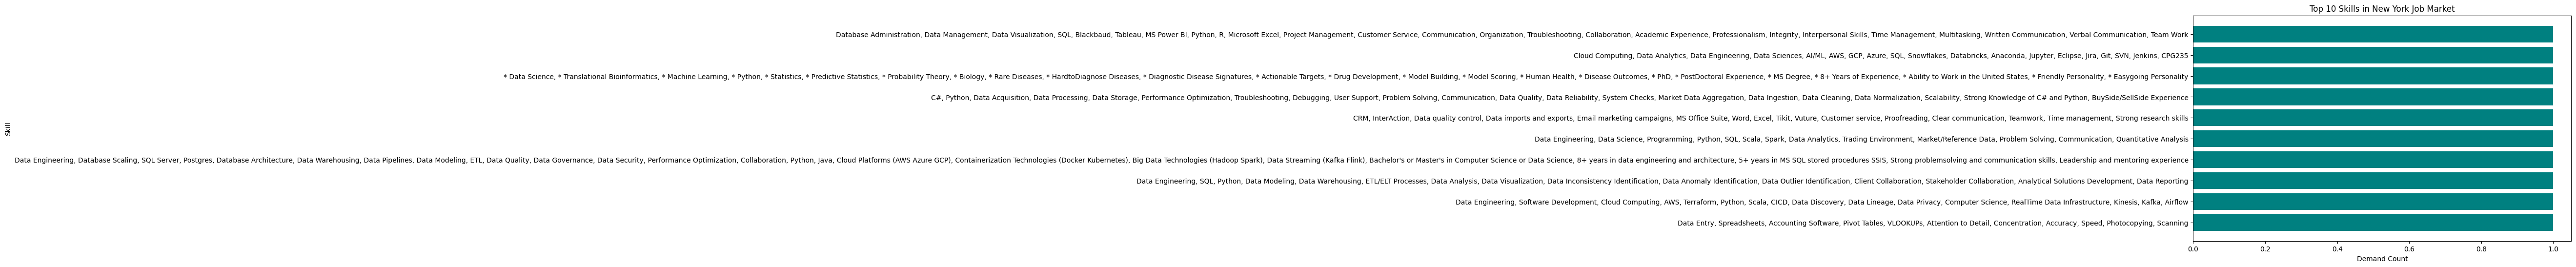

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge job postings with skills using 'job_link'
df_merged = pd.merge(df_postings, df_skills, on="job_link", how="inner")

# Compute skill counts for each location
location_skill_counts = (
    df_merged.groupby(["job_location", "job_skills"])["job_link"]
    .count()
    .reset_index()
)
location_skill_counts.rename(columns={"job_link": "count"}, inplace=True)

# Example: Retrieve top 10 skills in New York
ny_top_skills = (
    location_skill_counts[location_skill_counts["job_location"].str.contains("New York", case=False)]
    .sort_values("count", ascending=False)
    .head(10)
)

# Visualize the top 10 skills in New York using a horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(ny_top_skills["job_skills"], ny_top_skills["count"], color="teal")
plt.xlabel("Demand Count")
plt.ylabel("Skill")
plt.title("Top 10 Skills in New York Job Market")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


<h1>Visualize Top 10 Skills Across Selected Cities</h1>

/tmp/ipython-input-1597383953.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()        # Adjust layout to avoid overlaps


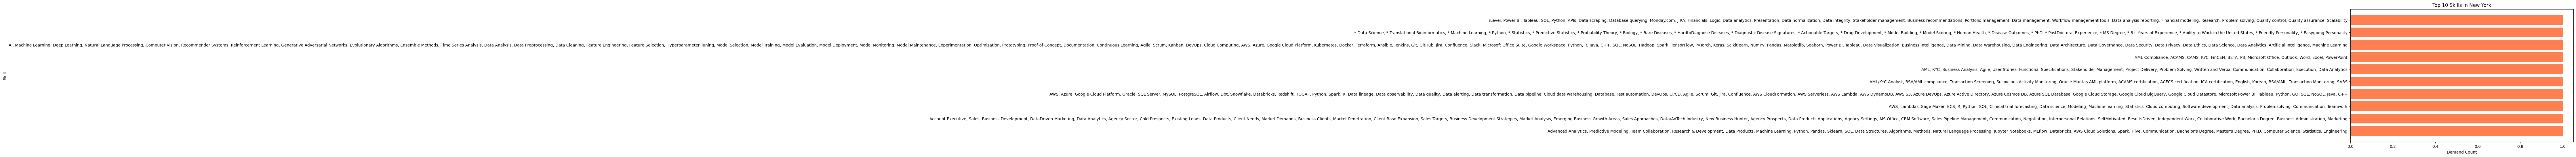

/tmp/ipython-input-1597383953.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()        # Adjust layout to avoid overlaps


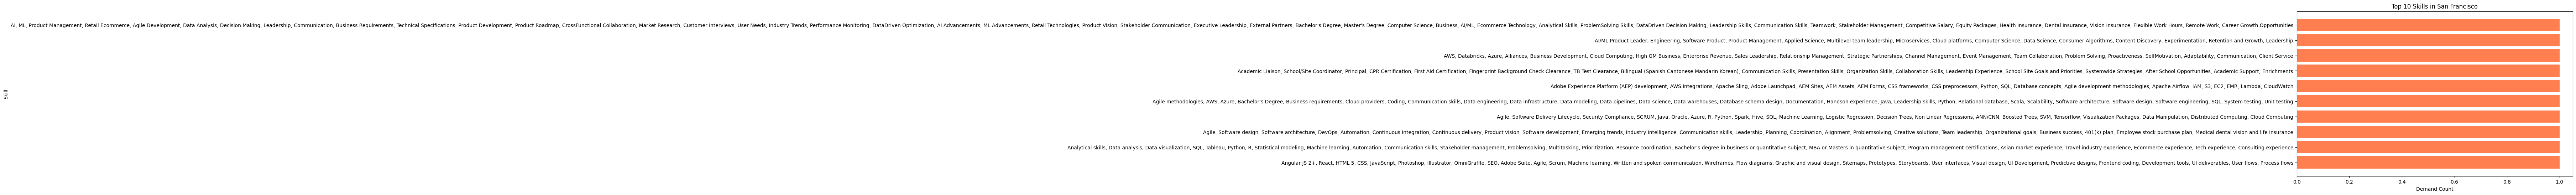

/tmp/ipython-input-1597383953.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()        # Adjust layout to avoid overlaps


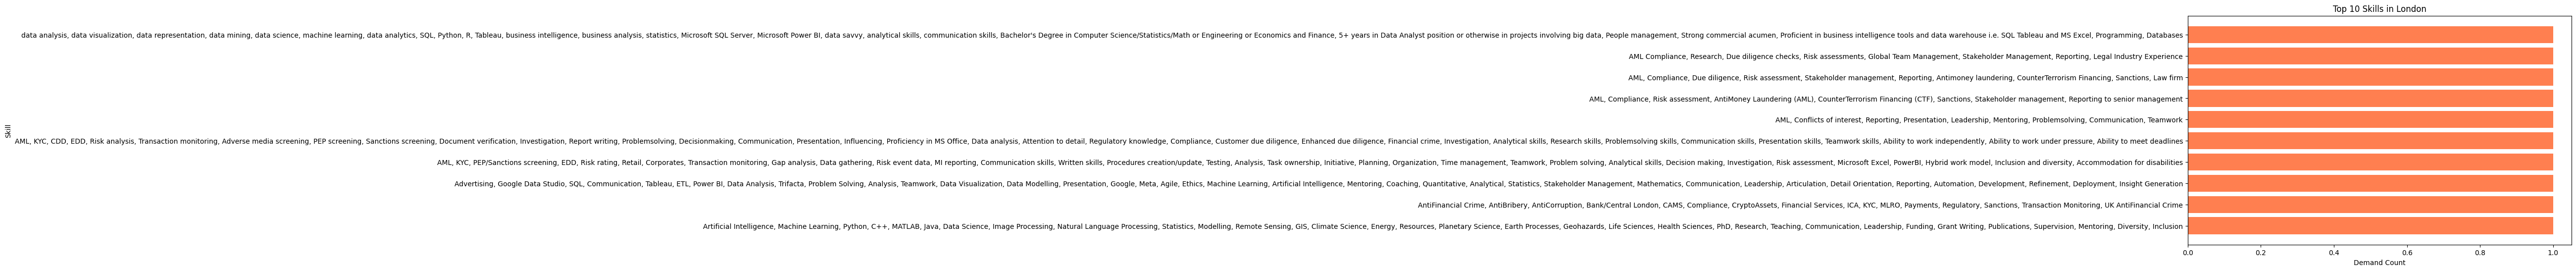

⚠️ No data found for Bangalore, skipping...


In [24]:
import matplotlib.pyplot as plt

# Define cities to analyze
cities = ["New York", "San Francisco", "London", "Bangalore"]

# Loop through each city to compute and visualize top 10 skills
for city in cities:
    # Filter dataset for the current city
    city_data = df_merged[df_merged["job_location"].str.contains(city, case=False, na=False)]

    # Skip if no data is available for the city
    if city_data.empty:
        print(f"⚠️ No data found for {city}, skipping...")
        continue

    # Calculate top 10 skills by count
    top_skills = (
        city_data.groupby("job_skills")
        .size()
        .reset_index(name="count")
        .sort_values("count", ascending=False)
        .head(10)
    )

    # Plot horizontal bar chart for the city's top skills
    plt.figure(figsize=(10,6))
    plt.barh(top_skills["job_skills"], top_skills["count"], color="coral")
    plt.xlabel("Demand Count")
    plt.ylabel("Skill")
    plt.title(f"Top 10 Skills in {city}")
    plt.gca().invert_yaxis()  # Invert y-axis for descending order
    plt.tight_layout()        # Adjust layout to avoid overlaps
    plt.show()


<h1>Analyze and Visualize Top Skills by Job Level</h1>

/tmp/ipython-input-4264562049.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to avoid overlaps


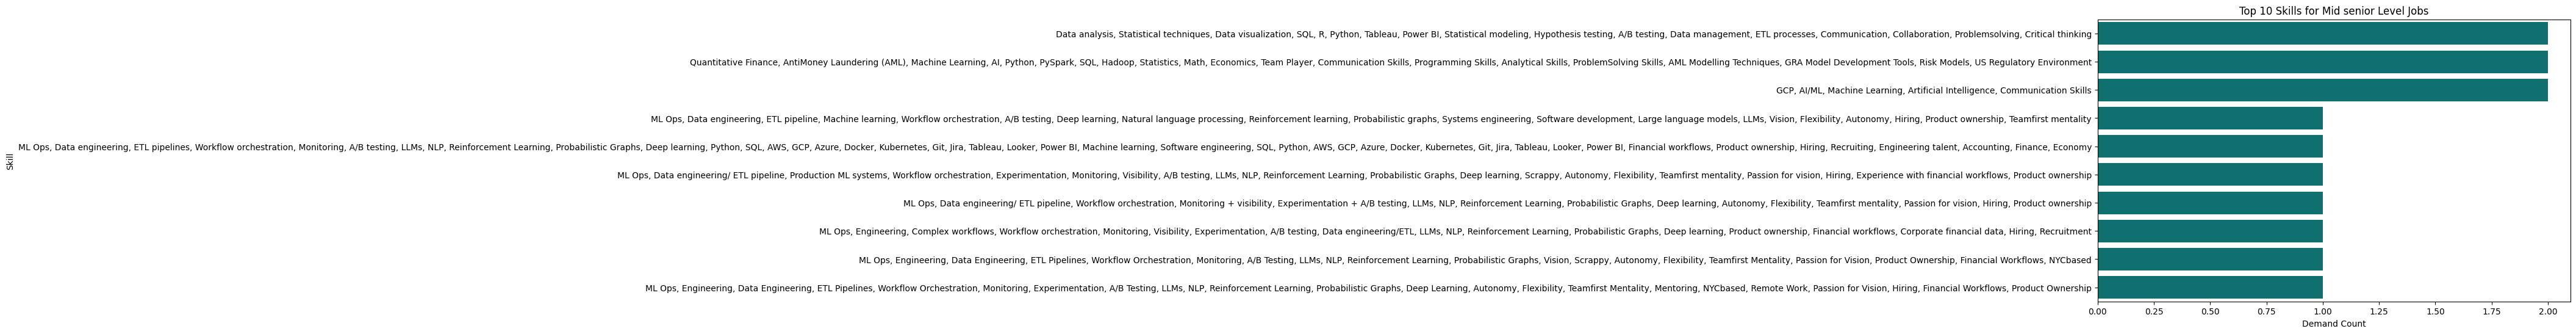

/tmp/ipython-input-4264562049.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to avoid overlaps


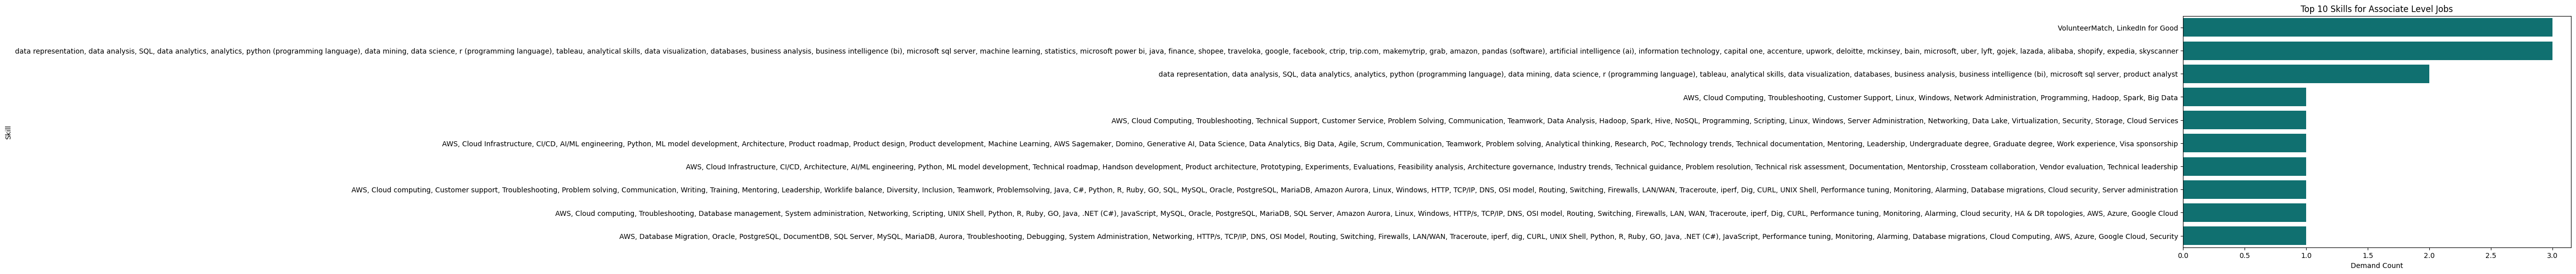

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group dataset by job level and skills, counting occurrences
level_skills = (
    df_merged.groupby(["job_level", "job_skills"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

# Identify unique job levels in the dataset
levels = df_merged["job_level"].dropna().unique()

# Loop through each job level to plot top 10 skills
for lvl in levels:
    top_lvl_skills = level_skills[level_skills["job_level"] == lvl].head(10)

    # Plot horizontal bar chart for top skills at this level
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=top_lvl_skills,
        x="count",
        y="job_skills",
        color="teal"
    )
    plt.title(f"Top 10 Skills for {lvl} Level Jobs")
    plt.xlabel("Demand Count")
    plt.ylabel("Skill")
    plt.tight_layout()  # Adjust layout to avoid overlaps
    plt.show()


In [26]:
print(df_postings.columns)
print(df_merged.columns)

Index(['job_link', 'last_processed_time', 'last_status', 'got_summary',
       'got_ner', 'is_being_worked', 'job_title', 'company', 'job_location',
       'first_seen', 'search_city', 'search_country', 'search_position',
       'job_level', 'job_type'],
      dtype='object')
Index(['job_link', 'last_processed_time', 'last_status', 'got_summary',
       'got_ner', 'is_being_worked', 'job_title', 'company', 'job_location',
       'first_seen', 'search_city', 'search_country', 'search_position',
       'job_level', 'job_type', 'job_skills'],
      dtype='object')


<h1>Analyze and Visualize Yearly Trends for Top 10 Job Skills</h1>

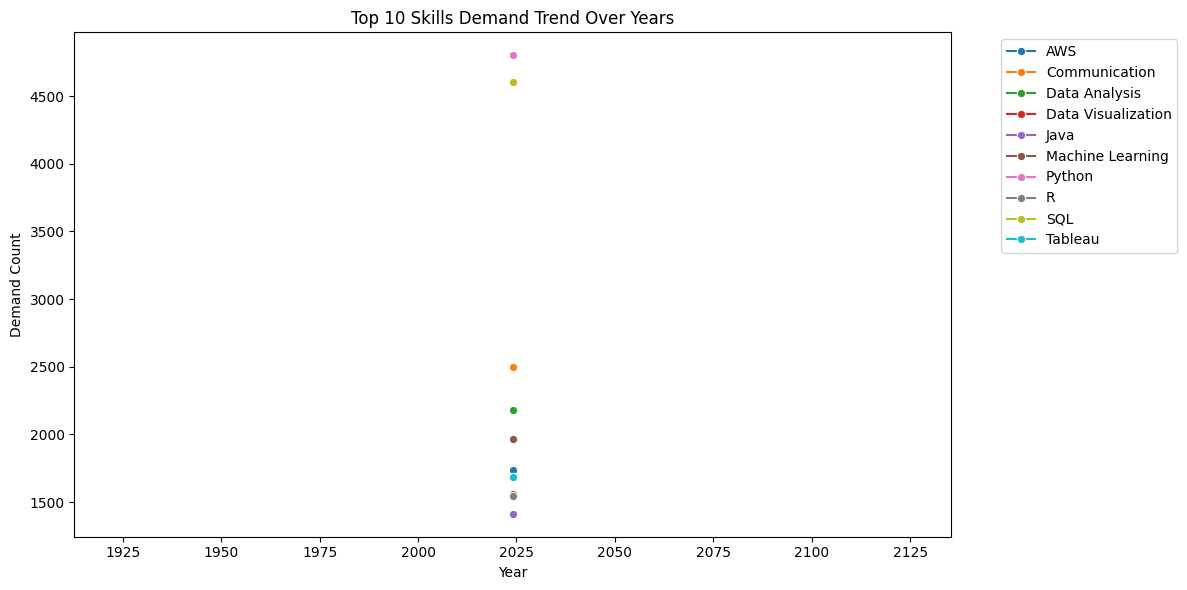

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Step 1: Convert 'first_seen' to datetime and filter years between 2000-2025
# -----------------------------
df_merged["first_seen"] = pd.to_datetime(df_merged["first_seen"], errors="coerce")
df_merged = df_merged[
    (df_merged["first_seen"].dt.year >= 2000) &
    (df_merged["first_seen"].dt.year <= 2025)
]
df_merged["year"] = df_merged["first_seen"].dt.year

# -----------------------------
# Step 2: Explode job_skills for analysis
# -----------------------------
df_exploded = df_merged.dropna(subset=["job_skills"]).copy()
df_exploded["job_skills"] = df_exploded["job_skills"].str.split(",")
df_exploded = df_exploded.explode("job_skills")
df_exploded["job_skills"] = df_exploded["job_skills"].str.strip()

# -----------------------------
# Step 3: Group by year and skill to count occurrences
# -----------------------------
trend = (
    df_exploded.groupby(["year", "job_skills"])
    .size()
    .reset_index(name="count")
)

# -----------------------------
# Step 4: Identify top 10 skills overall
# -----------------------------
top_skills = trend.groupby("job_skills")["count"].sum().sort_values(ascending=False).head(10).index
trend_top = trend[trend["job_skills"].isin(top_skills)]

# -----------------------------
# Step 5: Plot the trends over years
# -----------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_top, x="year", y="count", hue="job_skills", marker="o")
plt.title("Top 10 Skills Demand Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Demand Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside plot
plt.tight_layout()
plt.show()


<h1>Analyze and Visualize Top Skills in a Specific Company (Example: Google)</h1>

/tmp/ipython-input-758435654.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


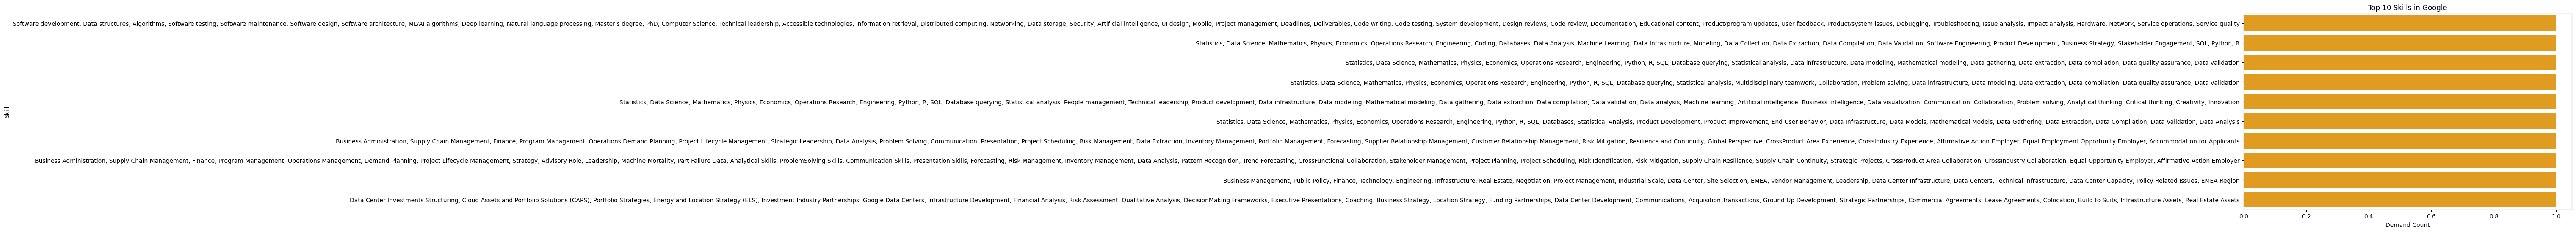

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group dataset by company and skills, counting occurrences
company_skills = (
    df_merged.groupby(["company", "job_skills"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

# Example: Retrieve top 10 skills for Google
google_skills = (
    company_skills[company_skills["company"].str.contains("Google", case=False, na=False)]
    .head(10)
)

# Plot horizontal bar chart of Google's top 10 skills
plt.figure(figsize=(10,6))
sns.barplot(data=google_skills, x="count", y="job_skills", color="orange")
plt.title("Top 10 Skills in Google")
plt.xlabel("Demand Count")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()


<h1>Define Reusable Functions for City-wise, Trend, and Company-wise Skill Analysis</h1>

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# =========================================================
# 1. City-wise Skill Demand
# =========================================================
def plot_city_skills(city, top_n=10):
    """
    Plots the top 'top_n' skills demanded in a specific city.

    Parameters:
    city (str): Name of the city to analyze.
    top_n (int): Number of top skills to display.
    """
    top_skills = (
        df_merged[df_merged["job_location"].str.contains(city, case=False, na=False)]
        .groupby("job_skills")
        .size()
        .reset_index(name="count")
        .sort_values("count", ascending=False)
        .head(top_n)
    )

    if top_skills.empty:
        print(f"No data available for {city}")
        return

    plt.figure(figsize=(12,8))
    sns.barplot(data=top_skills, x="count", y="job_skills", color="skyblue")
    plt.title(f"Top {top_n} Skills in {city}", fontsize=16, fontweight="bold")
    plt.xlabel("Demand Count", fontsize=14)
    plt.ylabel("Skill", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


# =========================================================
# 2. Skill Trend Over Time
# =========================================================
def plot_skill_trend(top_n=5):
    """
    Plots the demand trend of top 'top_n' skills over the years.

    Parameters:
    top_n (int): Number of top skills to visualize.
    """
    df_merged["first_seen"] = pd.to_datetime(df_merged["first_seen"], errors="coerce")
    df_merged["year"] = df_merged["first_seen"].dt.year

    trend = (
        df_merged.groupby(["year", "job_skills"])
        .size()
        .reset_index(name="count")
    )

    top_skills = (
        trend.groupby("job_skills")["count"]
        .sum()
        .sort_values(ascending=False)
        .head(top_n)
        .index
    )
    trend_top = trend[trend["job_skills"].isin(top_skills)]

    plt.figure(figsize=(12,8))
    sns.lineplot(data=trend_top, x="year", y="count", hue="job_skills", marker="o", linewidth=2.5)
    plt.title(f"Top {top_n} Trending Skills Over Years", fontsize=16, fontweight="bold")
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Demand Count", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title="Skills", fontsize=12, title_fontsize=13)
    plt.show()


# =========================================================
# 3. Company-wise Skill Demand
# =========================================================
def plot_company_skills(company, top_n=10):
    """
    Plots the top 'top_n' skills demanded in a specific company.

    Parameters:
    company (str): Name of the company to analyze.
    top_n (int): Number of top skills to display.
    """
    company_skills = (
        df_merged.groupby(["company", "job_skills"])
        .size()
        .reset_index(name="count")
        .sort_values("count", ascending=False)
    )

    company_data = company_skills[company_skills["company"].str.contains(company, case=False, na=False)].head(top_n)

    if company_data.empty:
        print(f"No data found for {company}")
        return

    plt.figure(figsize=(12,8))
    sns.barplot(data=company_data, x="count", y="job_skills", color="orange")
    plt.title(f"Top {top_n} Skills in {company}", fontsize=16, fontweight="bold")
    plt.xlabel("Demand Count", fontsize=14)
    plt.ylabel("Skill", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Execute Skill Analysis Functions for Selected Cities, Trends, and Companies

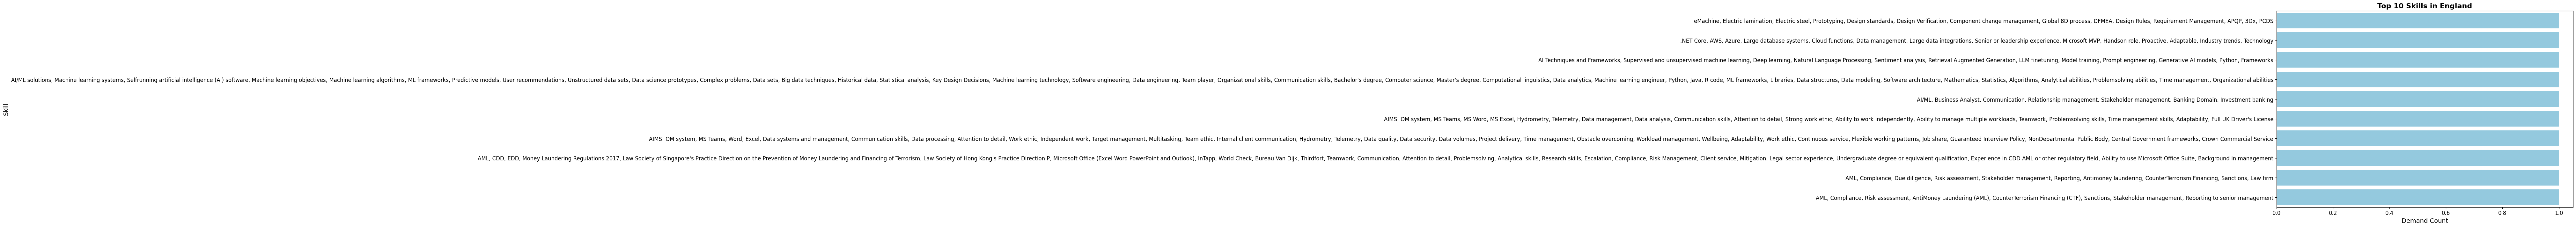

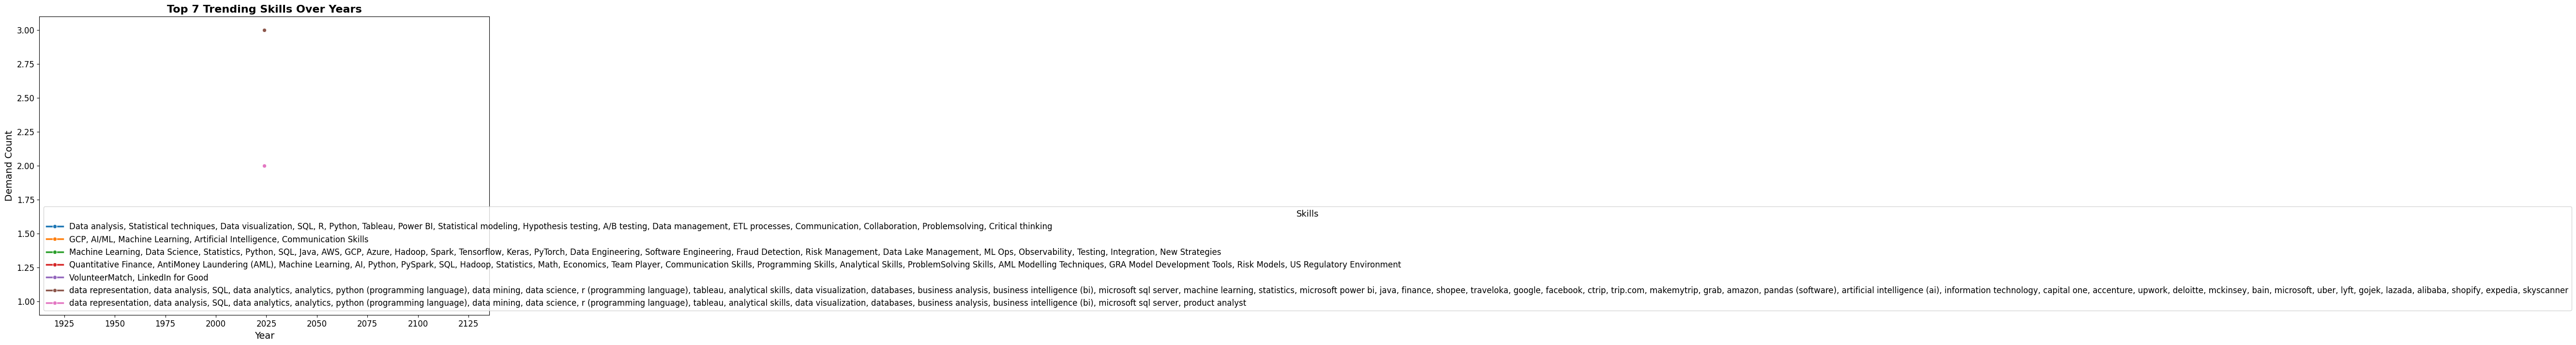

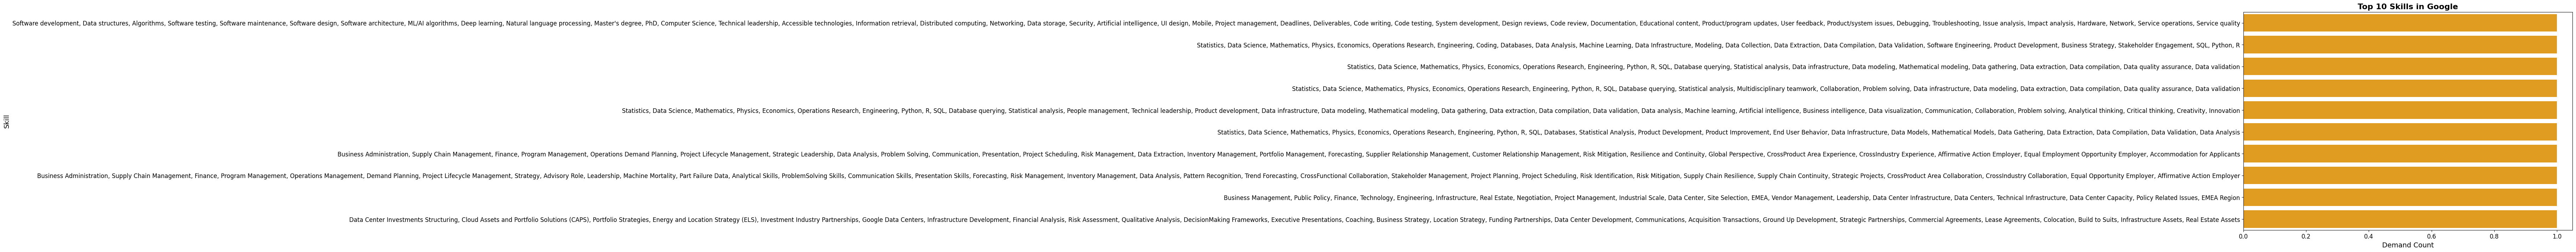

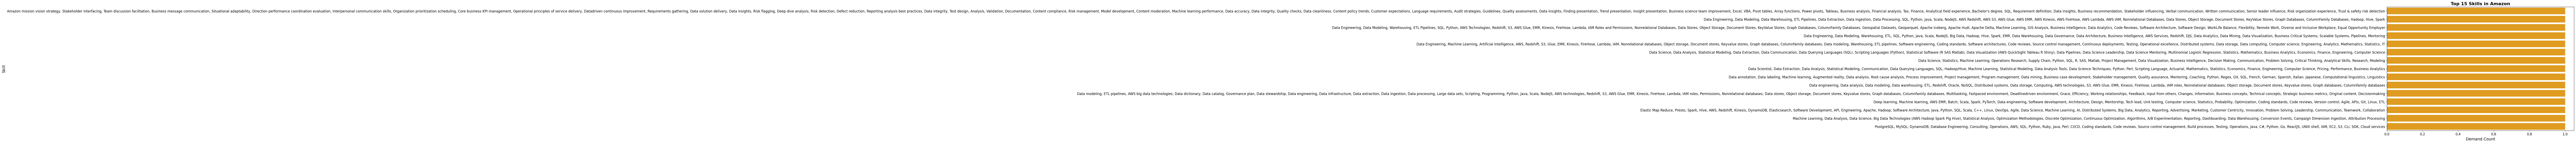

In [30]:
# 1. City-wise Skill Analysis
plot_city_skills("England")  # Display top skills in England

# 2. Skill Trend Over Time
plot_skill_trend(top_n=7)    # Visualize demand trend for top 7 skills over the years

# 3. Company-wise Skill Analysis
plot_company_skills("Google")         # Display top skills demanded by Google
plot_company_skills("Amazon", top_n=15)  # Display top 15 skills demanded by Amazon


reprocess Data: Date, Skills, City Extraction, and Helper Function for Top Skills

In [31]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Convert 'first_seen' to datetime and filter relevant years
df_merged["first_seen"] = pd.to_datetime(df_merged["first_seen"], errors="coerce")
df_merged = df_merged.dropna(subset=["first_seen"]).copy()
df_merged = df_merged[(df_merged["first_seen"].dt.year >= 2000) & (df_merged["first_seen"].dt.year <= 2025)]
df_merged["year"] = df_merged["first_seen"].dt.year

# 2) Explode 'job_skills' column from comma-separated strings to individual rows
df_exploded = df_merged.dropna(subset=["job_skills"]).copy()
df_exploded["job_skills"] = df_exploded["job_skills"].str.split(",")
df_exploded = df_exploded.explode("job_skills")
df_exploded["job_skills"] = df_exploded["job_skills"].str.strip().str.lower()

# 3) Extract city information
def pick_city(row):
    """
    Extracts city name from 'search_city' if available,
    otherwise takes the first token before a comma from 'job_location'.
    """
    if pd.notna(row.get("search_city")) and str(row["search_city"]).strip():
        return str(row["search_city"]).strip()
    loc = str(row.get("job_location", "")).strip()
    return loc.split(",")[0].strip()

df_exploded["city"] = df_exploded.apply(pick_city, axis=1)

# 4) Helper function: Get top N skills in any subset
def top_skills_in(df, top_n=10):
    """
    Returns the top 'top_n' most frequent skills in the given DataFrame subset.
    """
    return (df.groupby("job_skills").size()
            .reset_index(name="count")
            .sort_values("count", ascending=False)
            .head(top_n))


Compare Top Skills Across Multiple Cities Using Subplots

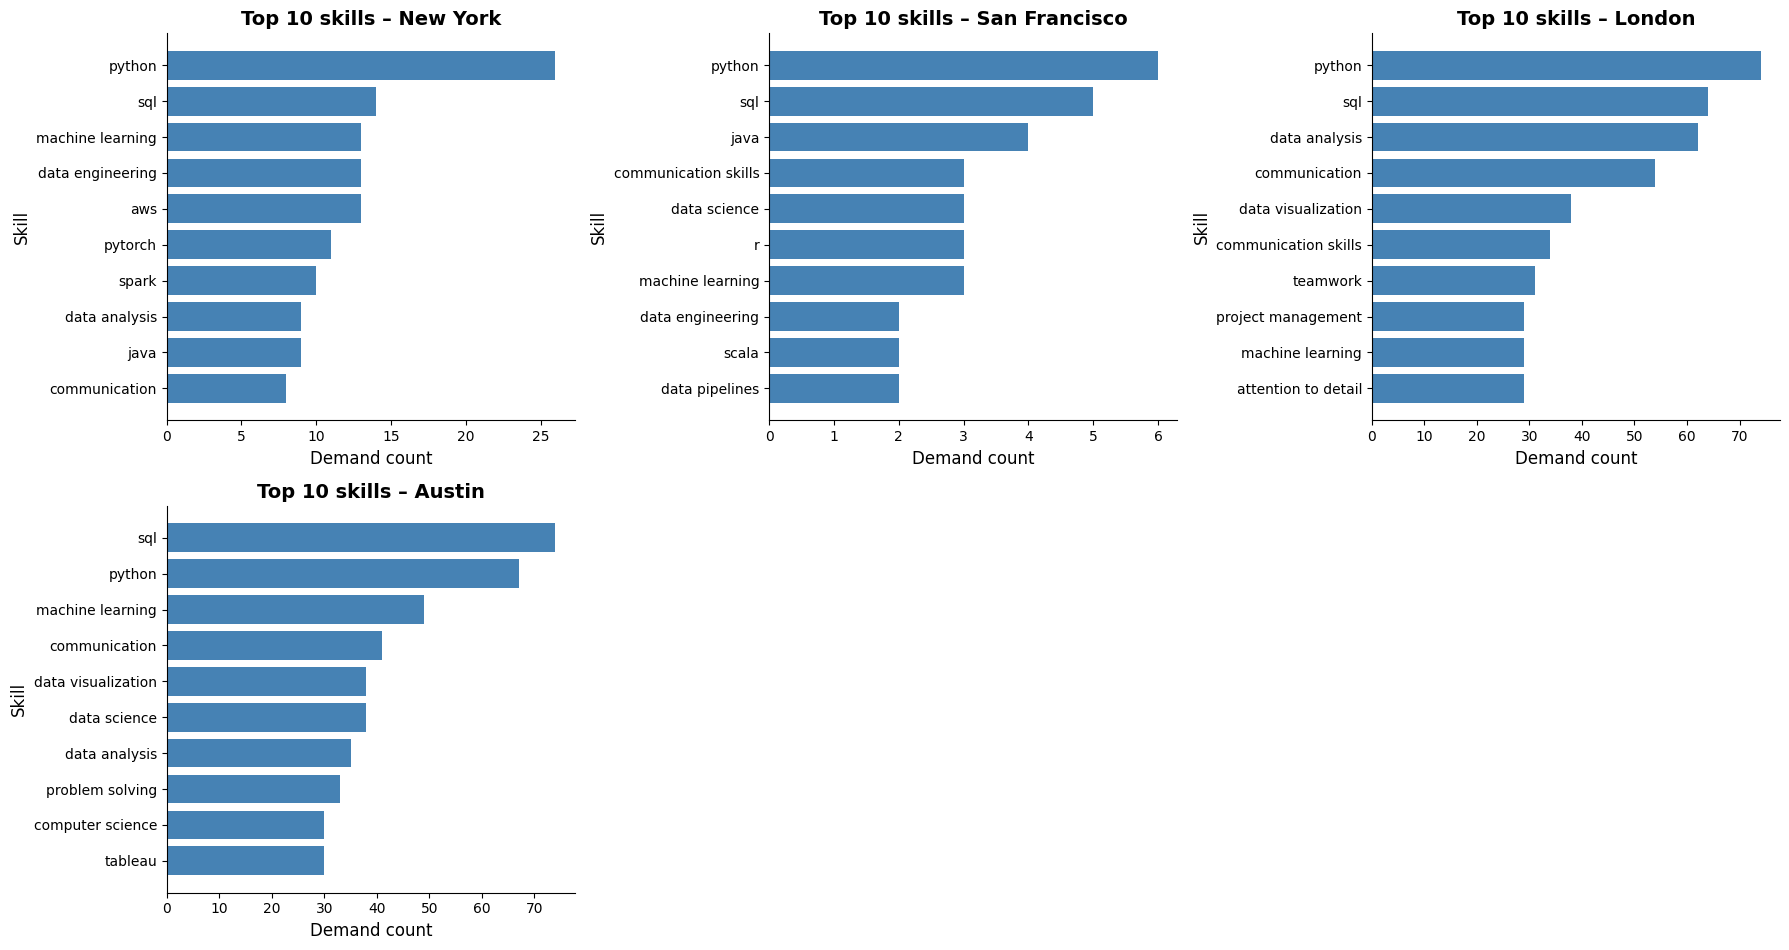

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def compare_cities_skills(cities, top_n=10):
    """
    Visualizes and compares top 'top_n' skills across multiple cities in a grid of horizontal bar charts.

    Parameters:
    cities (list): List of city names to analyze.
    top_n (int): Number of top skills to display per city.
    """
    n = len(cities)
    cols = min(3, n)  # Maximum 3 columns per row
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4.8*rows), squeeze=False)

    for i, city in enumerate(cities):
        r, c = divmod(i, cols)
        ax = axes[r][c]

        # Filter data for the city and get top skills
        data = df_exploded[df_exploded["city"].str.contains(city, case=False, na=False)]
        topk = top_skills_in(data, top_n)

        if topk.empty:
            ax.text(0.5, 0.5, f"No data for {city}", ha="center", va="center", fontsize=12)
            ax.axis("off")
            continue

        # Plot horizontal bar chart for the city
        ax.barh(topk["job_skills"], topk["count"], color="steelblue")
        ax.set_title(f"Top {top_n} skills – {city}", fontsize=14, fontweight="bold")
        ax.set_xlabel("Demand count", fontsize=12)
        ax.set_ylabel("Skill", fontsize=12)
        ax.invert_yaxis()

        # Remove top and right spines for a cleaner look
        for spine in ["top", "right"]:
            ax.spines[spine].set_visible(False)

    # Hide any empty subplots
    for j in range(i+1, rows*cols):
        r, c = divmod(j, cols)
        axes[r][c].axis("off")

    plt.tight_layout()
    plt.show()


# Example usage: Compare top skills across selected cities
compare_cities_skills(["New York", "San Francisco", "London", "Austin"], top_n=10)


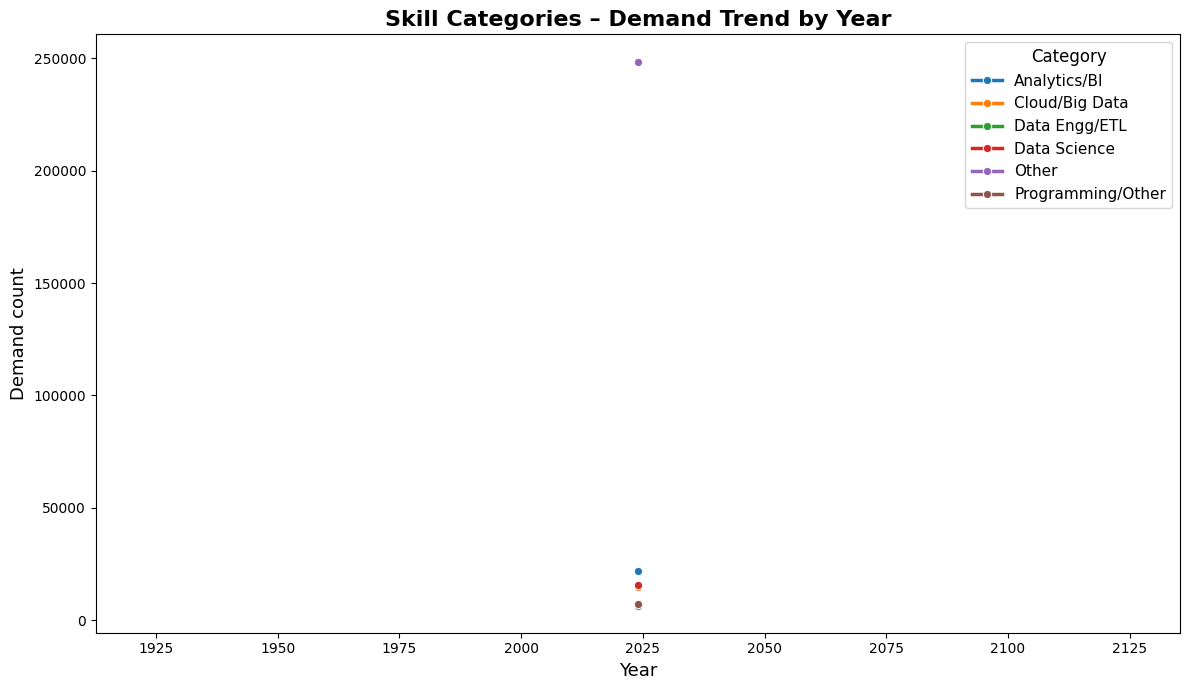

In [33]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1. Define Skill Category Buckets ==========
# Keywords are used to map each skill into a broader category
CATS = {
    "Data Science": [
        "python","pandas","numpy","scikit","scikit-learn","sklearn","machine learning",
        "ml","deep learning","tensorflow","pytorch","statistics","statistical","nlp","computer vision"
    ],
    "Analytics/BI": [
        "sql","excel","tableau","power bi","business intelligence","reporting","dashboards","data analysis","analytics"
    ],
    "Cloud/Big Data": [
        "aws","azure","gcp","snowflake","databricks","spark","hadoop","kafka","redshift","bigquery","data warehousing","data warehouse"
    ],
    "Data Engg/ETL": [
        "data engineering","airflow","dbt","etl","elt","data modeling","data pipeline","apache beam","glue"
    ],
    "Programming/Other": [
        "java","scala","r","go","c++","git","linux","docker","kubernetes"
    ],
}

# ========== 2. Map each skill to a category ==========
def map_category(skill: str) -> str:
    """
    Maps a skill to a predefined category using keyword matching.
    Returns 'Other' if no category matches.
    """
    s = skill.lower()
    for cat, keys in CATS.items():
        for k in keys:
            if re.search(rf"\b{re.escape(k)}\b", s):
                return cat
    return "Other"

df_exploded["category"] = df_exploded["job_skills"].apply(map_category)

# ========== 3. Compute yearly trend per category ==========
cat_trend = (
    df_exploded.groupby(["year", "category"])
    .size()
    .reset_index(name="count")
)

# ========== 4. Plot demand trend of skill categories ==========
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=cat_trend,
    x="year",
    y="count",
    hue="category",
    marker="o",
    linewidth=2.5
)
plt.title("Skill Categories – Demand Trend by Year", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=13)
plt.ylabel("Demand count", fontsize=13)
plt.legend(title="Category", fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()


Heatmap of Top 15 Skills Over the Years

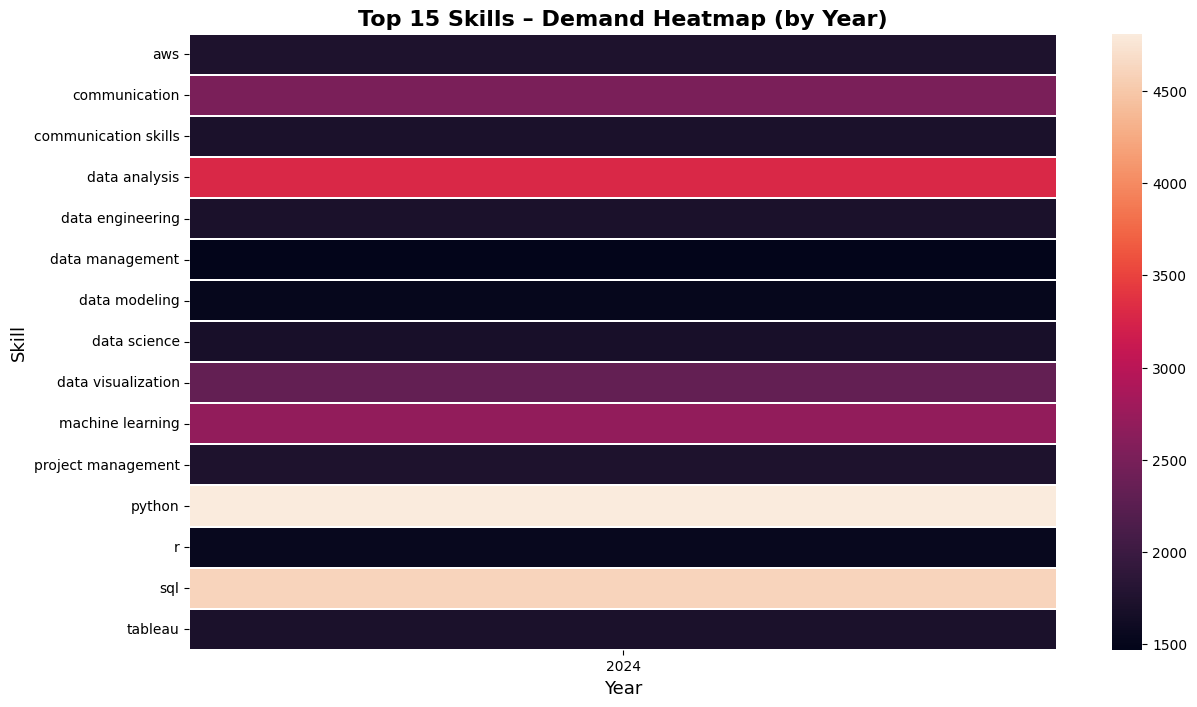

In [34]:
# pick top 15 skills overall
top15 = (df_exploded.groupby("job_skills").size()
         .sort_values(ascending=False).head(15)).index

heat = (df_exploded[df_exploded["job_skills"].isin(top15)]
        .groupby(["job_skills","year"]).size()
        .reset_index(name="count"))

pivot = heat.pivot(index="job_skills", columns="year", values="count").fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=False, linewidths=0.3)
plt.title("Top 15 Skills – Demand Heatmap (by Year)", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=13)
plt.ylabel("Skill", fontsize=13)
plt.show()


<h1>Linear Forecast of Skill Demand<h1>

/tmp/ipython-input-2841825660.py:13: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)


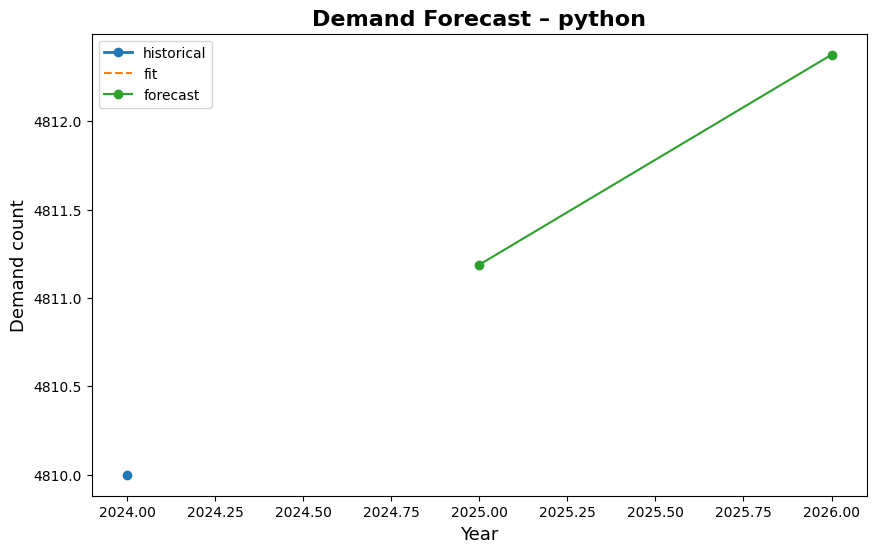

In [35]:
def forecast_skill(skill: str, years_ahead: int = 2):
    s = skill.lower()
    yearly = (df_exploded[df_exploded["job_skills"] == s]
              .groupby("year").size().reset_index(name="count"))
    if yearly.empty:
        print(f"No data for skill: {skill}")
        return

    x = yearly["year"].values.astype(float)
    y = yearly["count"].values.astype(float)

    # linear regression via polyfit
    m, b = np.polyfit(x, y, 1)
    last_year = int(x.max())
    future_years = np.arange(last_year+1, last_year+1+years_ahead)
    y_pred_future = m * future_years + b
    y_pred_now = m * x + b

    plt.figure(figsize=(10,6))
    plt.plot(x, y, marker="o", linewidth=2, label="historical")
    plt.plot(x, y_pred_now, linestyle="--", label="fit")
    plt.plot(future_years, y_pred_future, marker="o", label="forecast")
    plt.title(f"Demand Forecast – {skill}", fontsize=16, fontweight="bold")
    plt.xlabel("Year", fontsize=13)
    plt.ylabel("Demand count", fontsize=13)
    plt.legend()
    plt.show()

# EXAMPLE
forecast_skill("python", years_ahead=2)



<h1>Top Skills Demand per Company</h1>

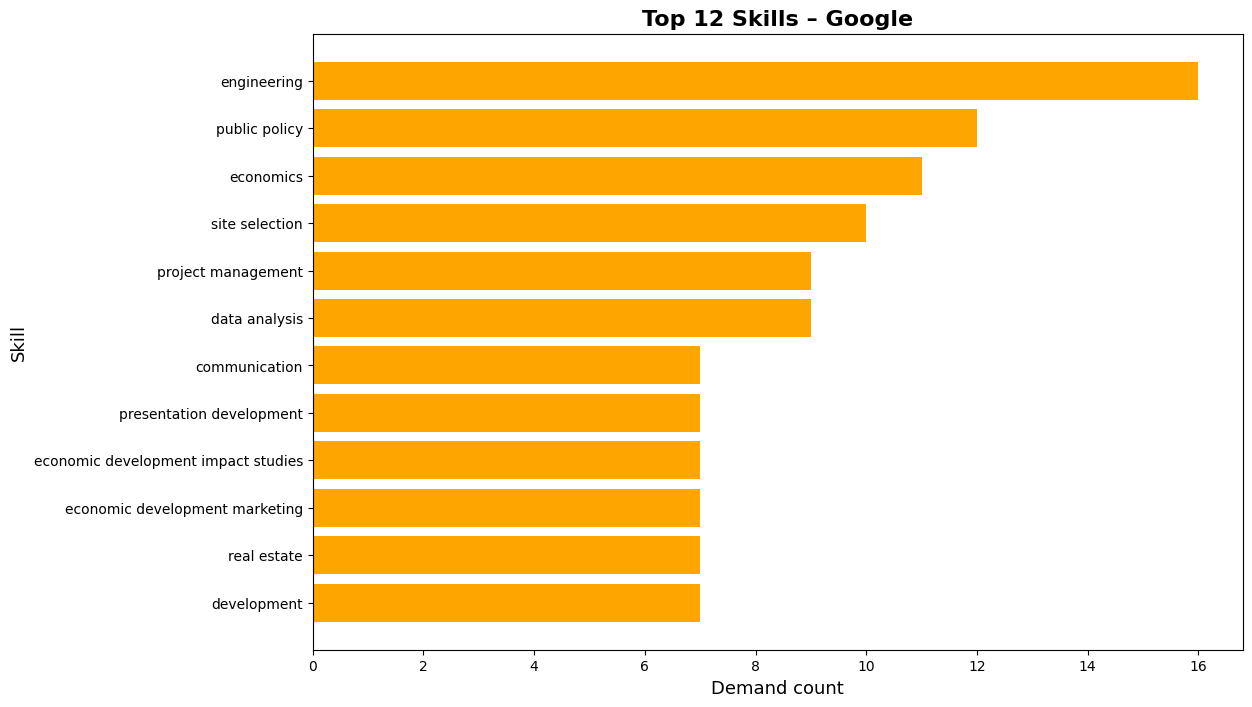

In [36]:
def plot_company_skills(company, top_n=12):
    frame = (df_exploded.groupby(["company","job_skills"])
             .size().reset_index(name="count"))
    q = frame[frame["company"].str.contains(company, case=False, na=False)]
    topk = (q.sort_values("count", ascending=False).head(top_n))
    if topk.empty:
        print(f"No data for company: {company}")
        return
    plt.figure(figsize=(12,8))
    plt.barh(topk["job_skills"], topk["count"], color="orange")
    plt.title(f"Top {top_n} Skills – {company}", fontsize=16, fontweight="bold")
    plt.xlabel("Demand count", fontsize=13)
    plt.ylabel("Skill", fontsize=13)
    plt.gca().invert_yaxis()
    plt.show()

# EXAMPLE
plot_company_skills("Google", top_n=12)
